<a href="https://colab.research.google.com/github/JunAns/Data-Analitics/blob/main/Data_Analys_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Mini Data Team/BI Analys/Week 1

/content/drive/MyDrive/Mini Data Team/BI Analys/Week 1


# Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


In [64]:
# 1. Load data
customers = pd.read_csv('customers.csv', header=None)
products = pd.read_csv('products.csv', header=None)
sales = pd.read_csv('sales.csv', header=None, skiprows=[1])


#  Add new Column

In [65]:
# 2. Tambahkan nama kolom
customers.columns = ['CustomerID', 'Name', 'Email', 'Phone', 'DOB', 'Gender', 'City', 'Membership', 'RegDate']
products.columns = ['ProductID', 'ProductName', 'Category', 'Brand', 'Cost', 'UnitPrice', 'EntryDate']
sales.columns = ['TransactionID', 'StoreID', 'ProductID', 'Date', 'Time', 'Qty', 'UnitPrice', 'Discount', 'TotalPrice',
                'PaymentMethod', 'CustomerType']

In [66]:
print(sales.columns)

Index(['TransactionID', 'StoreID', 'ProductID', 'Date', 'Time', 'Qty',
       'UnitPrice', 'Discount', 'TotalPrice', 'PaymentMethod', 'CustomerType'],
      dtype='object')


# Convert into Numeric type data

In [68]:
# 3. Konversi ke tipe data numerik
products['Cost'] = pd.to_numeric(products['Cost'], errors='coerce')
sales['Qty'] = pd.to_numeric(sales['Qty'], errors='coerce')
sales['UnitPrice'] = pd.to_numeric(sales['UnitPrice'], errors='coerce')
sales['Discount'] = pd.to_numeric(sales['Discount'], errors='coerce')
sales['TotalPrice'] = pd.to_numeric(sales['TotalPrice'], errors='coerce')

# Merge Data / table

In [69]:
# 4. Gabungkan data
sales = sales.merge(products[['ProductID', 'Category', 'Brand', 'Cost']], on='ProductID', how='left')

# Konversi kolom 'Cost' ke tipe data numerik setelah merge

sales['Revenue'] = sales['TotalPrice']
sales['Profit'] = sales['Revenue'] - (sales['Qty'] * sales['Cost'])

# Extract Month from Date

In [71]:
# 5. Ekstrak bulan dari tanggal
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Month'] = sales['Date'].dt.to_period('M').astype(str)

<ipython-input-71-3519200415>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')


In [73]:
# 6. Hitung KPI
total_revenue = sales['Revenue'].sum()
total_profit = sales['Profit'].sum()
total_customers = sales['CustomerType'].nunique()

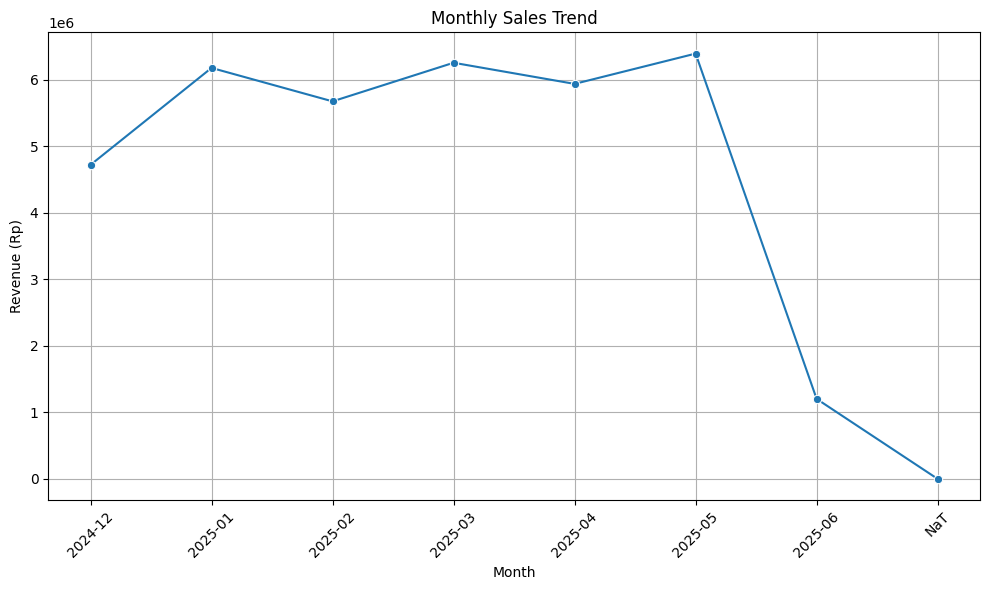

In [74]:
# 7. Sales Trend per Bulan
monthly_sales = sales.groupby('Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (Rp)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

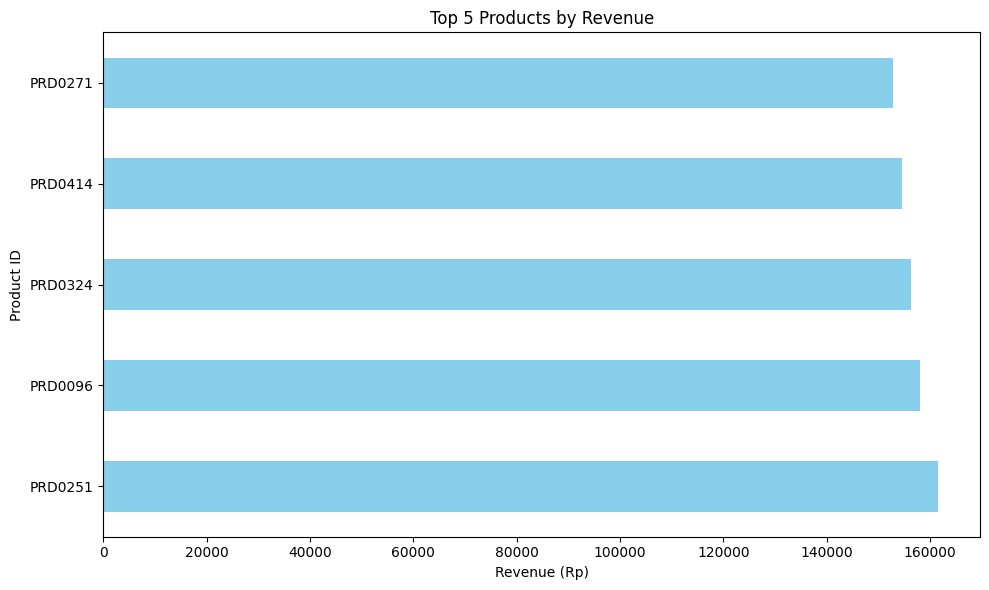

In [75]:
# 8. Top 5 Produk
top_products = sales.groupby('ProductID')['Revenue'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue (Rp)')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()


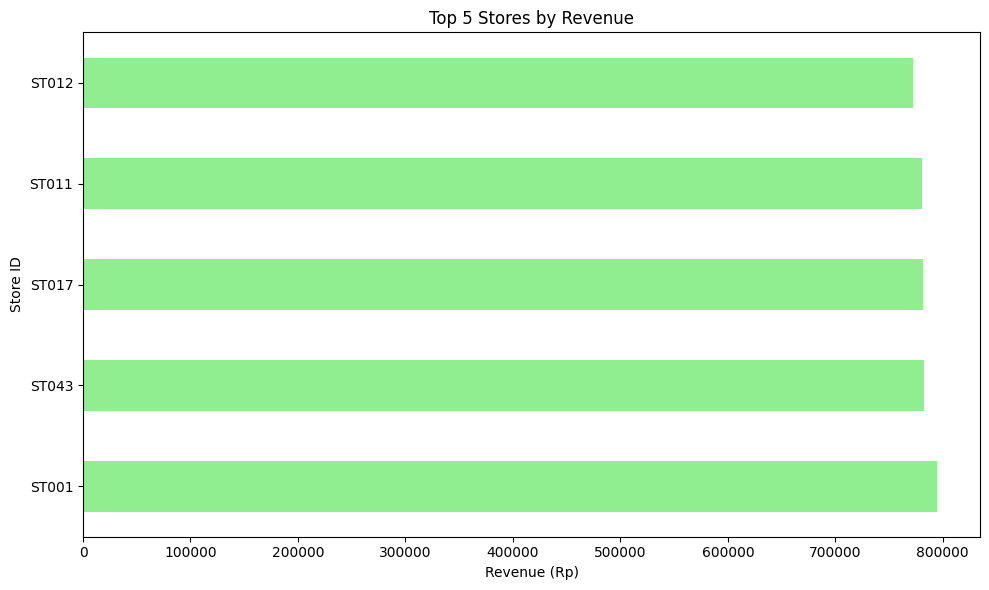

In [76]:
# 9. Top 5 Stores
top_stores = sales.groupby('StoreID')['Revenue'].sum().sort_values(ascending=False).head(5)
top_stores.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title('Top 5 Stores by Revenue')
plt.xlabel('Revenue (Rp)')
plt.ylabel('Store ID')
plt.tight_layout()
plt.show()

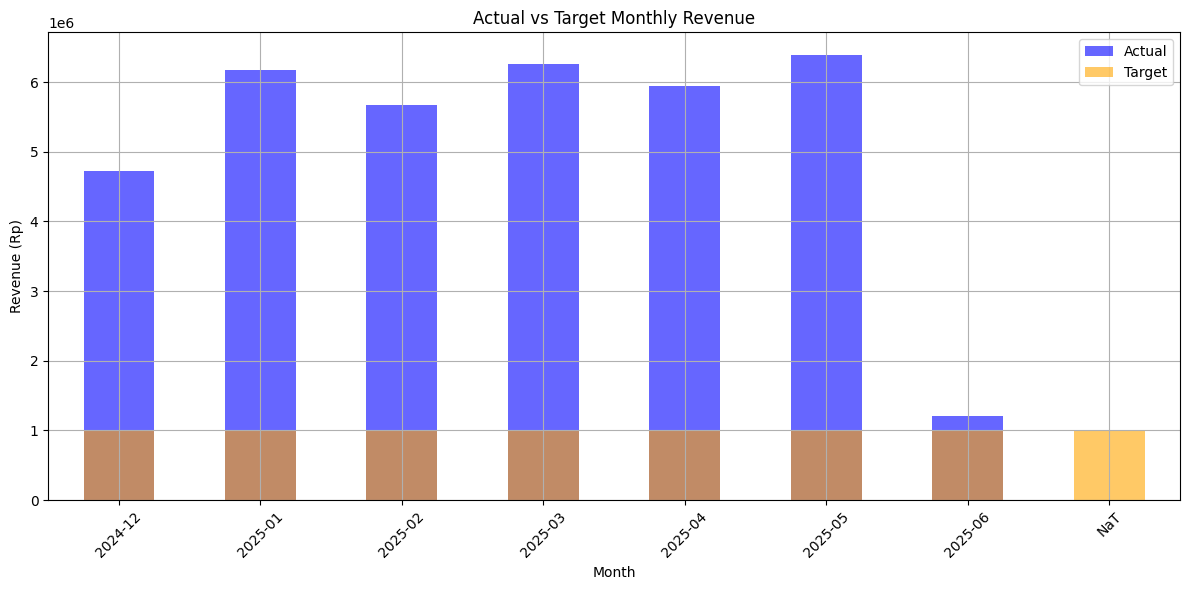

In [81]:
# 10. Actual vs Target
target_df = monthly_sales.copy()
target_df['Target'] = 1_000_000  # Rp 1 miliar
target_df['Achievement'] = target_df['Revenue'] >= target_df['Target']

plt.figure(figsize=(12, 6))
ax = target_df.set_index('Month')['Revenue'].plot(kind='bar', color='blue', alpha=0.6, label='Actual')
target_df.set_index('Month')['Target'].plot(kind='bar', color='orange', alpha=0.6, ax=ax, label='Target')
plt.title('Actual vs Target Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Rp)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()